# Titanic passenger dataset 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('train.csv', header = 0)

This function try to discover the connection between the chance of death or survive of Titanic passengers to other elements, which includes the age range, the ticket class, the gender, the family size, and also consider some minor elements like the title and the cabin position.

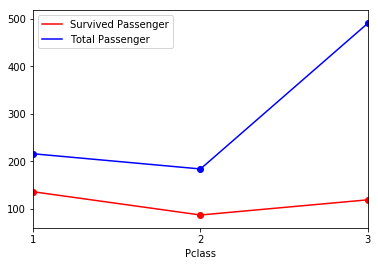

,PassengerNum,Pclass,Survived,Ratio
Pclass,,,,
1,216,1,136,62.962963
2,184,2,87,47.282609
3,491,3,119,24.236253


In [226]:
# Getting the classification of survivors into 3 different ticket classes

CS = pd.DataFrame()

CS['PassengerNum'] = df[['Pclass','Survived']].groupby(['Pclass'])['Survived'].count()
CS['Pclass'] = CS.index.values
CS['Survived'] = df[['Pclass','Survived']].groupby(['Pclass'])['Survived'].sum()
CS['Ratio'] = CS.Survived / CS.PassengerNum * 100

fig = plt.figure()
ax = fig.add_subplot(111)

width = 0.4

CS.Survived.plot(kind='line', color='red', ax=ax, label = 'Survived Passenger', xticks = CS['Pclass'])
CS.PassengerNum.plot(kind='line', color='blue', ax=ax, label = 'Total Passenger')
ax.legend()

ax.scatter(CS.Pclass,CS.Survived, color='red')
ax.scatter(CS.Pclass,CS.PassengerNum, color='blue')

plt.show()

CS

# Surviving ratio and ticket class chart
From the chart and the table, we can see that although most of the passengers are in class 3, the biggest number of survivors belong to class 1. And the living ratio also increase from lower class to higher class. It shows that there is a clear difference of treatment to passengers based on their ticket classes.

In [224]:
# Get the title from the name, create the classification in order to fill the gap of the age range

df['Title'] = df['Name'].str.split(',').str.get(1).str.split('.').str[0]

TS = pd.DataFrame()
TS['PassengerNum'] = df[['Title','Survived']].groupby(['Title'])['Survived'].count()
TS['Title'] = TS.index.values
TS['Survived'] = df[['Title','Survived']].groupby(['Title'])['Survived'].sum()
TS['Ratio'] = TS.Survived / TS.PassengerNum * 100

TS

,PassengerNum,Title,Survived,Ratio
Title,,,,
Capt,1,Capt,0,0.000000
Col,2,Col,1,50.000000
Don,1,Don,0,0.000000
Dr,7,Dr,3,42.857143
Jonkheer,1,Jonkheer,0,0.000000
Lady,1,Lady,1,100.000000
Major,2,Major,1,50.000000
Master,40,Master,23,57.500000
Miss,182,Miss,127,69.780220


# Titles
As shown above, there are many titles that give some ideas about the age (Master, Sir, Mrs,...),or the job of the passenger  (Major, Capt, Dr, Rev, ...)

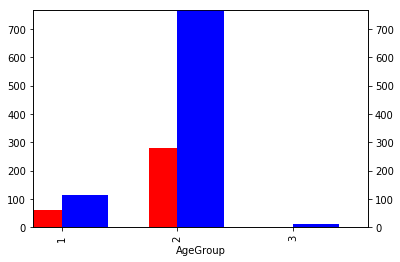

,PassengerNum,AgeGroup,Survived,Ratio
AgeGroup,,,,
1,113,1,61,53.982301
2,767,2,280,36.505867
3,11,3,1,9.090909


In [227]:
df['AgeGroup'] = 0

# Fill the gap in the age with the title
# Form 3 age group: children (<18) , aldult and elderly (>=65)

def f(row):
    if row['Age'] < 18 or row['Title'] == 'Master':
        val = 1
    elif row['Age'] >= 65 or row['Title'] == ['Mrs','Dr','Sir']:
        val = 3
    else:
        val = 2
    return val

df['AgeGroup'] = df.apply(f,axis=1)

AS = pd.DataFrame()
AS['PassengerNum'] = df[['AgeGroup','Survived']].groupby(['AgeGroup'])['Survived'].count()
AS['AgeGroup'] = AS.index.values
AS['Survived'] = df[['AgeGroup','Survived']].groupby(['AgeGroup'])['Survived'].sum()
AS['Ratio'] = AS.Survived / AS.PassengerNum * 100

fig = plt.figure()
ax = fig.add_subplot(111)
ax2 = ax.twinx()

width = 0.4

AS.Survived.plot(kind='bar', color='red', ax=ax)
AS.PassengerNum.plot(kind='bar', color='blue', ax=ax2, width=width, position=0)

ax.set_ylim(0,max(AS.PassengerNum))
ax2.set_ylim(0,max(AS.PassengerNum))

plt.show()

AS

# Age Groups
The graph shows that the biggest chance to be survive belongs to Age group 1, as childern are usually being taken care the most in rescue. The least chance was given to the old people, as only 1 in 3 people over 65 years old survived. 

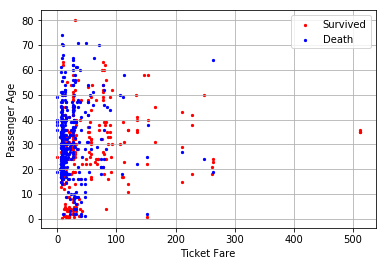

In [34]:
# Combine informations about the age, ticket fare and chance of surviving

fig, ax = plt.subplots()

xlive = df.Fare[df.Survived==1]
xdie = df.Fare[df.Survived==0]
ylive = df.Age[df.Survived==1]
ydie = df.Age[df.Survived==0]

m = ax.scatter(xlive, ylive, 5, 'r')
ax.hold
n = ax.scatter(xdie, ydie, 5, 'b')
ax.hold

ax.set_xlabel('Ticket Fare')
ax.set_ylabel('Passenger Age')

ax.legend([m,n],['Survived','Death'])
ax.grid(True)
plt.show()

# Combining Age and Ticket Fare
The scatter chart shows in a more detailed level, into the actual age and ticket fair of the passenger. It's easy to see that while most of the children under 5 survived, people who paid for higher price ticket were likelier to be saved.

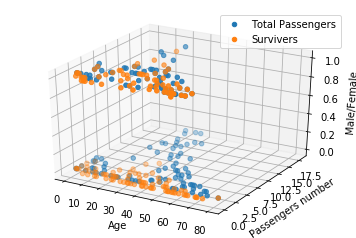

In [92]:
# Gender and Age

GS = pd.DataFrame()
GS['PassengerNum'] = df[['Age','Survived','Sex']].groupby(['Age','Sex'])['Survived'].count()
GS['Age'] = GS.index.get_level_values(0)
GS['Gender'] = GS.index.get_level_values(1)
GS['Gender'] = GS.Gender.map({'female' : 1, 'male' : 0}).astype(int)
GS['Survived'] = df[['Age','Survived','Sex']].groupby(['Age','Sex'])['Survived'].sum()

X = GS.Age
Y1 = GS.Survived
Y2 = GS.PassengerNum
Z = GS.Gender

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X,Y2,Z, label = 'Total Passengers')
ax.scatter(X,Y1,Z, label = 'Survivers')

ax.set_xlabel('Age')
ax.set_ylabel('Passengers number')
ax.set_zlabel('Male/Female')

ax.legend()
plt.show()

# Gender and Age
The chart shows some distribution between passengers' gender, age and surviving. We can see that while the number of female survivor is much more than male's, male survivor ages seem to range wider.

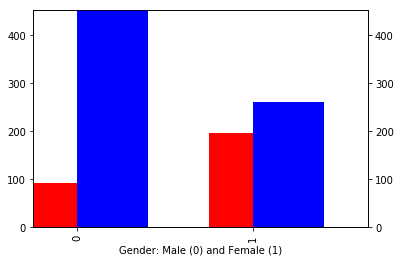

,Survivor,Gender,PassengerNum,Ratio
Gender,,,,
0,93,0,453,20.529801
1,197,1,261,75.478927


In [228]:
# The difference in Gender:

GSS = pd.DataFrame()

GSS['Survivor'] = GS[['Survived','Gender']].groupby(['Gender'])['Survived'].sum()
GSS['Gender'] = GSS.index.values
GSS['PassengerNum'] = GS[['PassengerNum','Gender']].groupby(['Gender'])['PassengerNum'].sum()
GSS['Ratio'] = GSS.Survivor / GSS.PassengerNum * 100

fig = plt.figure()
ax = fig.add_subplot(111)
ax2 = ax.twinx()

width = 0.4

GSS.Survivor.plot(kind='bar', color='red', ax=ax)
GSS.PassengerNum.plot(kind='bar', color='blue', ax=ax2, width=width, position=0)

ax.set_ylim(0,max(GSS.PassengerNum))
ax2.set_ylim(0,max(GSS.PassengerNum))
ax.set_xlabel('Gender: Male (0) and Female (1)')

plt.show()

GSS

# Chances for genders
While the total number of male passenger is almost double female, their survival chance was only 30% from women. And the number of female survivor is also double male's

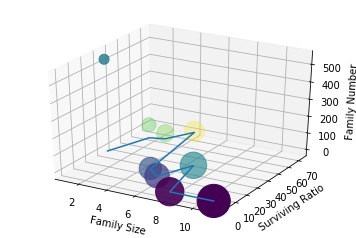

,PassengerNum,FamSize,Survived,FamNum,SurvivedRatio
FamilySize,,,,,
1,537,1,163,537.000000,30.353818
2,161,2,89,80.500000,55.279503
3,102,3,59,34.000000,57.843137
4,29,4,21,7.250000,72.413793
5,15,5,3,3.000000,20.000000
6,22,6,3,3.666667,13.636364
7,12,7,4,1.714286,33.333333
8,6,8,0,0.750000,0.000000
11,7,11,0,0.636364,0.000000


In [229]:
# Family matters

df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

FFS = pd.DataFrame()
FFS['PassengerNum'] = df[['FamilySize','Survived']].groupby(['FamilySize'])['Survived'].count()
FFS['FamSize'] = FFS.index.values
FFS['Survived'] = df[['FamilySize','Survived']].groupby(['FamilySize'])['Survived'].sum()
FFS['FamNum'] = FFS.PassengerNum / FFS.FamSize
FFS['SurvivedRatio'] = FFS.Survived / FFS.PassengerNum * 100

from mpl_toolkits.mplot3d import axes3d
import numpy as np

X = FFS.FamSize
Y = FFS.SurvivedRatio
Z = FFS.FamNum

fig = plt.figure()
ax = fig.gca(projection='3d')

ax.plot(X,Y)
ax.scatter(X, Y, Z, s = (X*100), c = Y)

ax.set_xlabel('Family Size')
ax.set_ylabel('Surviving Ratio')
ax.set_zlabel('Family Number')

plt.show()

FFS

# Family matters

From the chart, we can see that most people travel alone, and most families ranks from 2 to 4 people. However, as there were no integers in family numbers, it suggests that there maybe some gaps in the source data. The biggest chance to survive went to people from families of 3 and 4. While almost no people survived in biggest families.

In [230]:
# The cabin groups

df.loc[df['Cabin'].notnull(), 'Cabin Index'] = df['Cabin'].str[0]

CS = pd.DataFrame()
CS['PassengerNum'] = df[['Cabin Index','Survived']].groupby(['Cabin Index'])['Survived'].count()
CS['Survived'] = df[['Cabin Index','Survived']].groupby(['Cabin Index'])['Survived'].sum()
CS['Ratio'] = CS.Survived / CS.PassengerNum * 100

CS

,PassengerNum,Survived,Ratio
Cabin Index,,,
A,15,7,46.666667
B,47,35,74.468085
C,59,35,59.322034
D,33,25,75.757576
E,32,24,75.000000
F,13,8,61.538462
G,4,2,50.000000
T,1,0,0.000000


# The cabin groups
As there is so many lost information in the cabin columns, it's impposible to obtain the full information. However, from existing data, the cabin can be divided into groups based on their first letter. While most people who have enough information stayed in cabin B and C, the highest chance of surviving went to people from B, D and E

In [235]:
S = pd.DataFrame()
D = pd.DataFrame()

S = df[df.Survived==1]
D = df[df.Survived==0]


print('Most survivor are:')
print()
print('From Class: ', S['Pclass'].value_counts(sort=True).index[0])
print('Have the gender: ', S['Sex'].value_counts(sort=True).index[0])
print('Have the title: ', S['Title'].value_counts(sort=True).index[0])

if S['AgeGroup'].value_counts(sort=True).index[0] == 1:
    u = 'children'
else: 
    if S['AgeGroup'].value_counts(sort=True).index[0] == 2:
        u = 'adult'
    else: u ='elderly'

print('In the age group: ',u)
print('Be with a family of: ',S['FamilySize'].value_counts(sort=True).index[0],'people')
print('In the cabin: ',S['Cabin Index'].value_counts(sort=True).index[0])
print()


print('Most people that did not survive are:')
print()
print('From Class: ', D['Pclass'].value_counts(sort=True).index[0])
print('Have the gender: ', D['Sex'].value_counts(sort=True).index[0])
print('Have the title: ', D['Title'].value_counts(sort=True).index[0])

if D['AgeGroup'].value_counts(sort=True).index[0] == 1:
    u = 'children'
else: 
    if D['AgeGroup'].value_counts(sort=True).index[0] == 2:
        u = 'adult'
    else: u ='elderly'

print('In the age group: ',u)
print('Be with a family of: ',D['FamilySize'].value_counts(sort=True).index[0],'people')
print('In the cabin: ',D['Cabin Index'].value_counts(sort=True).index[0])

Most survivor are:

From Class:  1
Have the gender:  female
Have the title:   Miss
In the age group:  adult
Be with a family of:  1 people
In the cabin:  C

Most people that did not survive are:

From Class:  3
Have the gender:  male
Have the title:   Mr
In the age group:  adult
Be with a family of:  1 people
In the cabin:  C


# Conclusion: the most frequent values
This final function gives the most frequent values belong to survivor and death people. However, because it was effected by the number of passenger, some information was duplicate. For example, because most people stayed in cabin C, so it appeared in both 2 sections.
Other information can be trustful:
+ Most of the survivor is female, aldult, single and in First class
+ Most of the people who did not survive is male, aldult, single and in Third class